In [1]:
# importing the necessary modules

import math
import numpy as np
import matplotlib.pyplot as plt

# Question 1.a

If we consider the last rectangle in the interval, the $k^{th}$ index, which is from $x = a + (k - 1)h$ to $x = a + kh$. Then the value of the function at the left endpoint of that rectangle is $f(a+(k-1)h)$. Then the area of the last rectangle is $A = f(a+(k-1)h)*h$.  

If we apply the same idea to the first three rectangles, where k is the index,, and h is the width of each rectangle, which is the same for all rectangles since the intervals are evenly spaced. The areas of the first three rectangles are: $f(a)*h$, $f(a+h)*h$, $f(a+2h)*h$, respectively.  

Generalizing this into a sum of k-rectangles each of width h, we get 
$$A_{T} = h \sum_{k=1}^{N}f(x_{k-1})$$
Given the definition of an integral, the above equation is the same as the definition. Therefore,
$$I(a,b) = \int_{a}^{b}f(x)dx \approx h\sum_{k=1}^{N}{f}(x_{k-1})$$

# Question 1.b

In [2]:
def rectangle_int(f, a: float, b: float, N: int) -> float:
    """
        Computes the integral of f(x) from a to b using the rectangle method.

    Args:
        f  the function to integrate
        a (float): lower limit of integration
        b (float): upper limit of integration
        N (int): iteration number

    Returns:
        float: the integral of f(x) from a to b
    """
    
    # get the step size
    h = (b-a)/N
    # initialize the sum
    s = 0
    for k in range(N):
        s = s + f(a + k*h)
    # compute the integral
    I = h*s
    return I

# Question 1.c

In [3]:
# function of f(x)
def f(x):
    return x**4 - 2*x + 1

rectangle_int(f, 0, 2, 100)

4.281066656

### Comparing to the Trapezoid and Simpson's rule

In [4]:
def trapz_int(f, a: float, b: float, N: int) -> float:
    """
        Computes the integral of f(x) from a to b using the rectangle method.

    Args:
        f  the function to integrate
        a (float): lower limit of integration
        b (float): upper limit of integration
        N (int): iteration number

    Returns:
        float: the integral of f(x) from a to b
    """
    h = (b-a)/N
    
    s = (f(a) + f(b))/2
    for k in range(1,N):
        s = s + f(a + k*h)
    I = s*h
    
    
    return I

def simpson_int(f, a: float, b: float, N: int) -> float:
    """
        Computes the integral of f(x) from a to b using the rectangle method.

    Args:
        f  the function to integrate
        a (float): lower limit of integration
        b (float): upper limit of integration
        N (int): iteration number

    Returns:
        float: the integral of f(x) from a to b
    """
    # Define h based on inputs
    h = (b-a)/N
    
    # Start with the boundary contributions
    s = f(a) + f(b)
    
    # Add all the even and odd sample points separately. Notice the for loops, and how steps were used.
    for k in range(1,N,2):
        s = s + 4*f(a + k*h)
        
    for k in range(2,N,2):
        s = s + 2*f(a + k*h)
    
    # Finally, multiply by h/3
    I = s*h/3
    return I

print(trapz_int(f,0,2,100))
print(simpson_int(f,0,2,100))
print(rectangle_int(f,0,2,100))

4.401066656
4.400000042666667
4.281066656


### Trapezoid and Simpson's rule are more accurate than the Rectangular rule

# Question 2.a

Let's label the derivative $f'(x)$ as another function, call it $g(x) = f'(x)$. The error term therefore looks like 

$$\frac{h^{2}}{2}\sum_{k = 1}^{N}g(x_{k-1}) \: .$$

We can further re-write this as 


$$\bigg(\frac{h}{2}\bigg) \bigg(h \sum_{k = 1}^{N}g(x_{k-1})\bigg) \: ,$$


and we realise from Eq. 2 of the HW, that the second paranthesis is nothing by the integration of $g(x)$ over the interval $a$ to $b$ which is simply $f(x)$ evaluated at the limits, hence giving

$$\frac{h^2}{2} \sum_{k=1}^{N} f'(x_{k-1}) = \frac{h}{2}(f(b)-f(a))$$

# Question 2.b

In [5]:
N_arr = np.logspace(math.log10(2), 5, num = 50, base = 10.0)

def fp(x):
    return 4*x**3 - 2

def fppp(x):
    return 24*x

def errors(a: float, b: float, N: int) -> float:
    """
        Computes the error of f(x) from a to b using the 3 integration methods.

    Args:
        a (float): lower limit of integration
        b (float): upper limit of integration
        N (int): number of iterations

    Returns:
        float: the error of f(x) from a to b
    """
    h = (b-a)/N
    # compute the error for the rectangle method
    err_rect = abs(h*(f(b) - f(a))/2)
    # compute the error for the trapezoid method
    err_trapz = abs(h**2 * (fp(a) - fp(b)))/12
    # compute the error for the simpson method
    err_simpson = abs(h**4 * (fppp(a) - fppp(b)))/180
    
    return err_rect, err_trapz, err_simpson

err_rect, err_trapz, err_simpson = errors(0,2,N_arr)

### Plotting the error of each integral method

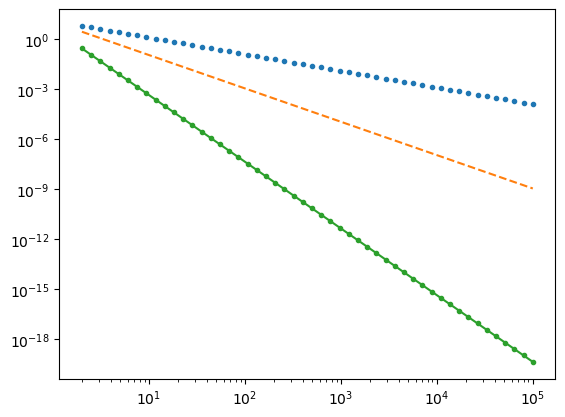

In [6]:
plt.plot(N_arr,err_rect,'.')
plt.plot(N_arr,err_trapz,'--')
plt.plot(N_arr,err_simpson,'.-')

plt.xscale('log')
plt.yscale('log')

# Question 3.a
Given
$$x = \frac{1}{1-z} dz$$ 

Differentiating with respect to z, and using Quotient rule:
$$\frac{dx}{dz} = \frac{(1-z)(1) - z(1)}{(1-z)^2}$$
$$\frac{dx}{dz} =\frac{1}{(1-z)^2}$$
Then this can become 
$$ dx =\frac{dz}{(1-z)^2}$$

And the limits of integration transform accordingly
when $x=0$, $z=0$  
and when $x=\infty$, $z=1$

# Question 3.b

Transforming 
$$I = \int_{0}^{\infty}xe^{-x^3}dx$$ 
to $dz$, we get:
$$I = \int_{0}^{1}(\frac{z}{1-z})e^{-(\frac{z}{1-z})^3}\frac{dz}{(1-z)^2}$$

In [7]:
#define f(z) first 
def f(z): 
    x = z / (1-z)
    return x * np.exp(-x**3) / (1-z)**2

# add 1e-12 to the lower limit and subtract 1e-12 from the upper limit to avoid the singularity
simpson_int(f,0 + 1e-12,1-1e-12,100)

0.45137264447617514

# Question 3.c

$$
H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)
$$

$$
H_{n}(x) = 2xH_{n-1}(x) - 2(n-1)H_{n-2}(x)
$$

In [8]:
def H(n: int, x: float) -> float:
    """
        Computes the Hermite polynomial of order n at x.

    Args:
        n (int): the order of the Hermite polynomial
        x (float): the value at which to evaluate the Hermite polynomial

    Returns:
        float: the value of the Hermite polynomial of order n at x
    """
    
    # base cases
    if n == 0:
        return 1*np.ones(np.size(x))
    elif n == 1:
        return 2*x
    # recursive step
    else:
        return 2*x*H(n-1,x) - 2*(n-1)*H(n-2,x)

# Question 3.d

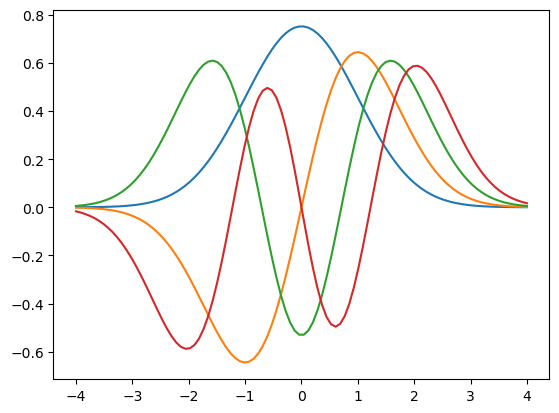

In [9]:
x_arr = np.linspace(-4,4,100)
for n in [0,1,2,3]:
    psi_n = H(n,x_arr)*np.exp(-np.square(x_arr)/2)/math.sqrt((2**n)*math.factorial(n)*math.sqrt(math.pi))
    plt.plot(x_arr,psi_n)

# Question 3.e

The Hermite polynomial's symmetry and shape in the wavefunction $\psi_n(x)$ is determined by the terms that are always positive, such as the exponential and square root terms. The $x$ term in the integrand determines the parity of the integrand.

When $n$ is odd, $\psi_n(x)$ is an odd function. Multiplying this by $x$ in the integral results in an even function. However, integrating an even function from $-\infty$ to $+\infty$ over symmetric limits doesn't necessarily yield zero.

Conversely, when $n$ is even, $\psi_n(x)$ is an even function. Multiplying this by $x$ results in an odd function. Integrating an odd function over symmetric limits yields zero because symmetry around the origin cancels out the positive end of the curve with the negative end of the curve.

For the case that $n = 0$, $H_0(x) = 1$ which makes the integrand an odd function and therefore yields zero over symmetric limits. Therefore, $n = 0$ and $n = 2$ will yield zero



# Question 3.f

The wavefunction of the nth energy
$$
\psi_n(x) = \frac{e^{-x^2/2}}{\sqrt{2^nn!\sqrt{\pi}}}H_n(x)
$$

Born's rule

$$
{\langle x^2 \rangle}_n = \int_{-\infty}^{\infty} x^2 |\psi_n(x)|^2 dx
$$

Given 
$$x = \frac{z}{1-z^2}$$
then diffrentiating with respect to $z$ and using the Quotient rule we get:
$$dx = \frac{1-z^2-z(-2z)}{(1-z^2)^2}dz$$
$$dx = \frac{1+z^2}{(1-z^2)^2}dz$$

This maps $x = \pm \infty$ to $z = \pm 1$. 

In [10]:
a = -1 + 1e-12
b = 1 - 1e-12
N = 1000

def psi_n(n,x):
    return H(n,x)*np.exp(-np.square(x)/2)/(math.sqrt((2**n)*math.factorial(n)*math.sqrt(math.pi)))

def simp_rms_psi(n: int, a: float, b: float, N: int) -> float:
    """
        Calculates the root mean square of the wavefunction psi_n(x) over the interval [a,b] using Simpson's rule.

    Args:
        n (int): The quantum number of the wavefunction psi_n(x)
        a (float): The lower bound of integration
        b (float): The upper bound of integration
        N (int): number of iterations

    Returns:
        float: The root mean square of the wavefunction psi_n(x) over the interval [a,b]
    """
    
    def f(x):
        psi = psi_n(n,x)
        return (x**2)*(psi**2)
    
    # Define h based on inputs
    h = (b-a)/N
    # Define the sample points
    zpts = np.linspace(a,b,N, endpoint=True)
    # Start with the boundary contributions
    s = 0.0
    z = zpts[0]
    # Add all the even and odd sample points separately. Notice the for loops, and how steps were used.
    s = s + f(z/(1-z**2))  * (1 + z**2)/((1 - z**2)**2)
    z = zpts[-1]
    s = s + f(z/(1-z**2))  * (1 + z**2)/((1 - z**2)**2)
    
    for k in range(1,N,2):
        z = zpts[k]
        s = s  + 4*f(z/(1-z**2))  * (1 + z**2)/((1 - z**2)**2)

    for k in range(2,N,2):
        z = zpts[k]
        s = s  + 2*f(z/(1-z**2))  * (1 + z**2)/((1 - z**2)**2)
    
    I = s*h/3
    return I

simp_rms_psi(5, a, b, N)

array([5.4945])